In [ ]:
## NEURAL NETWORKS FOR IMAGE PROCESSING 

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt 

In [6]:
# loading the mnist pictures dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D,Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# splitting the dataset into train and test  
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 168s 15us/step


In [8]:
# adding the 4th dimension to the images i.e color channels
x_train = x_train.reshape((x_train.shape[0], 28,28,1))

# each pixel goes from 0 to 255 so we normalize pixels by dividing them by 255, that way each pixel will go from 0 to 1
x_train = x_train.astype('float32') / 255.0

y_train = to_categorical(y_train)

In [10]:
# Defining our model
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [11]:
# After defining our model we compile it using Stochastic Gradient Descent (SGD) as the optimizer
optimizer = SGD(learning_rate = 0.01, momentum=0.9)
model.compile(
     optimizer = optimizer,
     loss = 'categorical_crossentropy',
     metrics = ['accuracy']
)

Epoch 1/10
1875/1875 [==============================] - 29s 13ms/step - loss: 0.2245 - accuracy: 0.9305
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0690 - accuracy: 0.9794
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0457 - accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0331 - accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0244 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0139 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0091 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0069 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 25s 13m

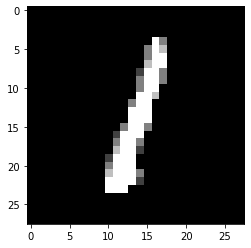

1/1 [==============================] - 0s 103ms/step


In [12]:
# We fit the model, this starts the training process
history = model.fit(x_train,y_train,epochs=10,batch_size = 32)

# Now we test the model but we can't forget to reshape and normalize the image
image = random.choice(x_test)

plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()

image = (image.reshape((1,28,28,1))).astype('float32') / 255.0


# The result is a one-hot-encoded vector, that's why I take the argmax value and that's the result
digit = np.argmax(model.predict(image)[0], axis = -1)

In [13]:
print("Prediction:",digit)

Prediction: 1


NameError: name 'chdir' is not defined